In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import warnings
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_classes_names = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train')
all_classes_names

['Ak', 'Nazli', 'Dimnit', 'Buzgulu', 'Ala_Idris']

In [ ]:
AK_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Ak'
Ala_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Ala_Idris'
buzgulu_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Buzgulu'
dimnit_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Dimnit'
nazli_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Nazli'



AK_files = os.listdir(AK_path)
Ala_files = os.listdir(Ala_path)
buzgulu_files = os.listdir(buzgulu_path)
dimnit_files = os.listdir(dimnit_path)
nazli_files = os.listdir(nazli_path)



print("length of AK:", len(AK_files))
print("length of Ala:", len(Ala_files))
print("length of buzhulu :", len(buzgulu_files))
print("length of dimnit:", len(dimnit_files))
print("length of nazli:", len(nazli_files))

length of AK: 70
length of Ala: 70
length of buzhulu : 70
length of dimnit: 70
length of nazli: 70


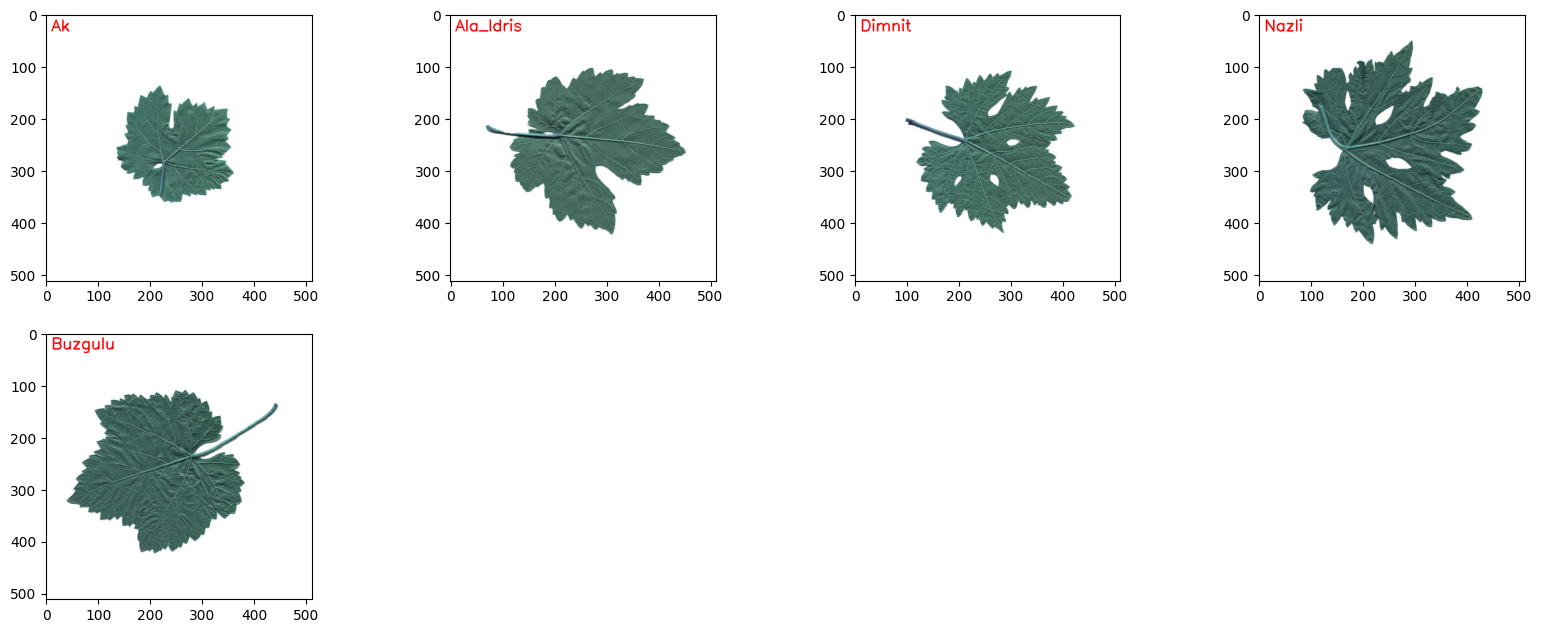

In [ ]:
plt.figure(figsize = (20,20))

random_range = random.sample(range(len(all_classes_names)), 5)

for counter, random_index in enumerate(random_range, 1):

    selected_class_Name = all_classes_names[random_index]

    image_files_names_list = os.listdir(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/{selected_class_Name}')

    selected_image_file_name = random.choice(image_files_names_list)

    img = cv2.imread(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/{selected_class_Name}/{selected_image_file_name}')


    cv2.putText(img, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    plt.subplot(5, 4, counter);plt.imshow(img);plt.axis('on')

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 224,224

DATASET_DIR = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train"

CLASSES_LIST = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli']

In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])


def create_dataset(class_name,class_index):
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []
    labels = []


    files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR, class_name, file_name)
      img=cv2.imread(img)



      white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      img[white_pixels] = 0

      if percentage >= 80:
         img=generator1.random_transform(img)
      else :
         img=generator2.random_transform(img)


      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      labels.append(class_index)
      i+=1
    print(f"Number of data in class {class_name} = ",i)

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

In [ ]:
features_Ak, labels__Ak = create_dataset('Ak',0)
features_Ala_Idris, labels_Ala_Idris = create_dataset('Ala_Idris',1)
features_Buzgulu, labels_Buzgulu = create_dataset('Buzgulu',2)
features_Dimnit, labels_Dimnit = create_dataset('Dimnit',3)
features_Nazli, labels_Nazli = create_dataset('Nazli',4)

Number of data in class Ak =  70
Number of data in class Ala_Idris =  70
Number of data in class Buzgulu =  70
Number of data in class Dimnit =  70
Number of data in class Nazli =  70


In [ ]:
features_Ak.shape,labels__Ak.shape

((70, 224, 224, 3), (70,))

In [ ]:
features_Ala_Idris.shape,labels_Ala_Idris.shape

((70, 224, 224, 3), (70,))

In [ ]:
features_Buzgulu.shape,labels_Buzgulu.shape

((70, 224, 224, 3), (70,))

In [ ]:
features_Dimnit.shape,labels_Dimnit.shape

((70, 224, 224, 3), (70,))

In [ ]:
features_Nazli.shape,labels_Nazli.shape

((70, 224, 224, 3), (70,))

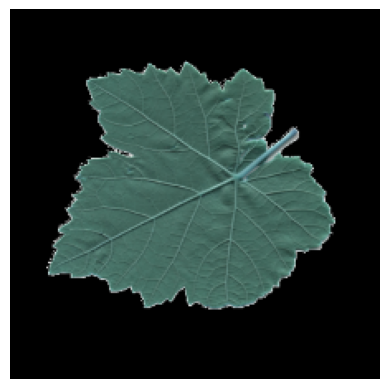

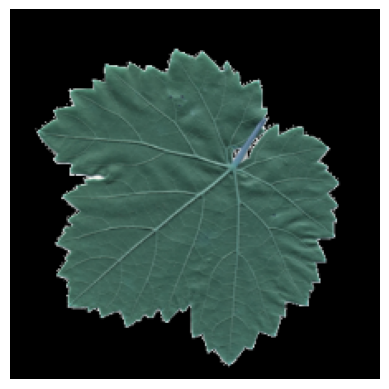

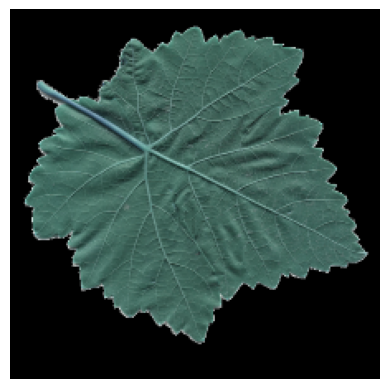

In [ ]:
for i in range(3):

  plt.imshow(features_Ak[i,:,:,:])
  plt.axis('off')
  plt.show()

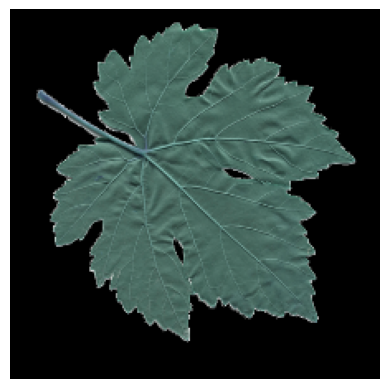

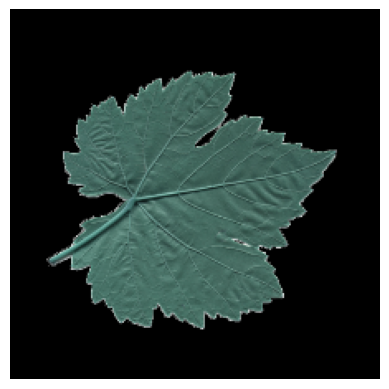

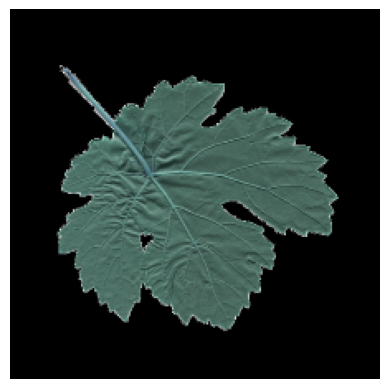

In [ ]:
for i in range(3):

  plt.imshow(features_Ala_Idris[i,:,:,:])
  plt.axis('off')
  plt.show()

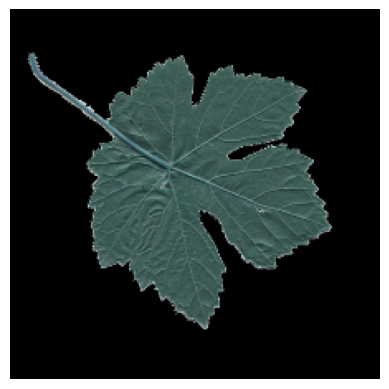

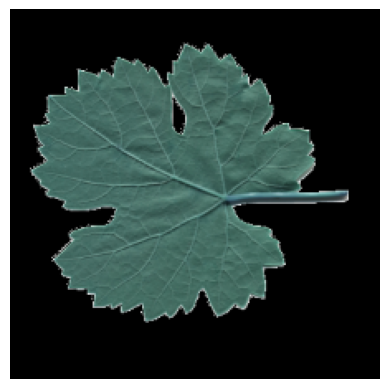

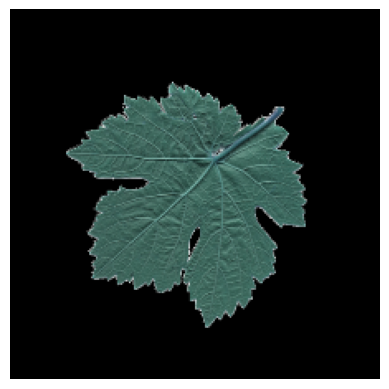

In [ ]:
for i in range(3):

  plt.imshow(features_Buzgulu[i,:,:,:])
  plt.axis('off')
  plt.show()

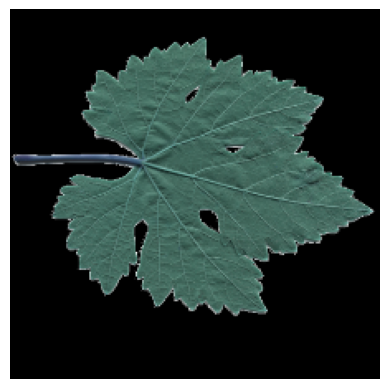

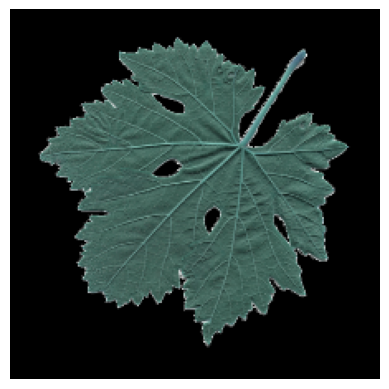

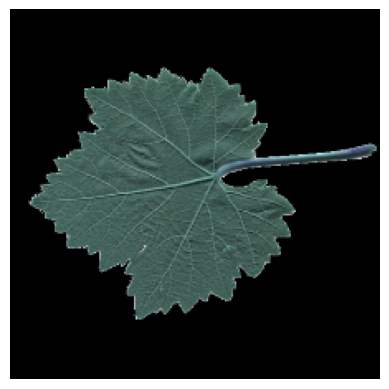

In [ ]:
for i in range(3):

  plt.imshow(features_Dimnit[i,:,:,:])
  plt.axis('off')
  plt.show()

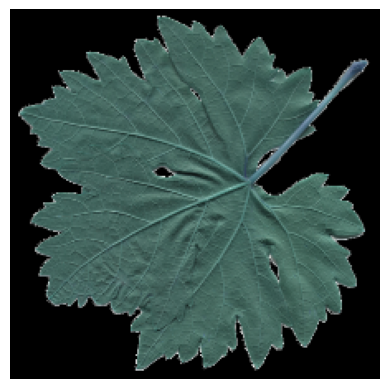

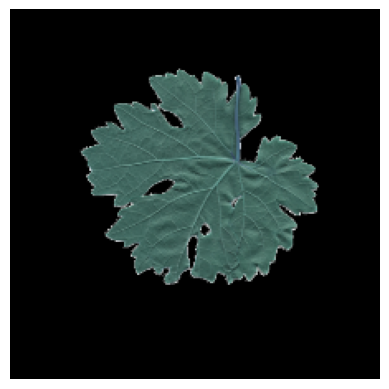

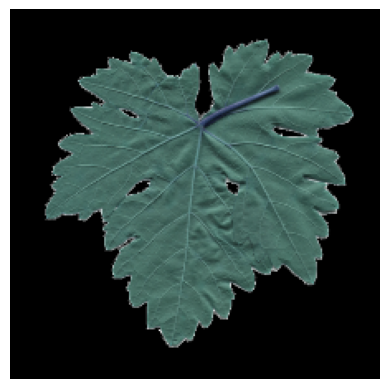

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:

generator=ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    )


In [ ]:

generator2=ImageDataGenerator(
    rotation_range=60,
    horizontal_flip=False,
    vertical_flip=True,
    )


In [ ]:
augmented_img_list = []
for img in features_Nazli:

  augmented_img = generator.random_transform(img)
  features_Nazli=np.append(features_Nazli,augmented_img)

features_Nazli = np.reshape(features_Nazli, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
# List to store augmented images
augmented_img_list = []

# Iterate through each original image
for img in features_Nazli:
    # Apply transformation using the first generator
    augmented_img = generator.random_transform(img)
    # Apply transformation using the second generator
    augmented_img = generator2.random_transform(augmented_img)
    # Append augmented image to the list
    augmented_img_list.append(augmented_img)

# Convert the list of augmented images to a NumPy array
features_Nazli_augmented = np.array(augmented_img_list)

In [ ]:
features_Nazli_augmented.shape

(140, 224, 224, 3)

In [ ]:
# Concatenate the original and augmented images along the first axis
features_Nazli_combined = np.concatenate((features_Nazli, features_Nazli_augmented), axis=0)

# Print the shapes to verify
print("Original Features Shape:", features_Nazli.shape)
print("Augmented Features Shape:", features_Nazli_augmented.shape)
print("Combined Features Shape:", features_Nazli_combined.shape)


Original Features Shape: (140, 224, 224, 3)
Augmented Features Shape: (140, 224, 224, 3)
Combined Features Shape: (280, 224, 224, 3)


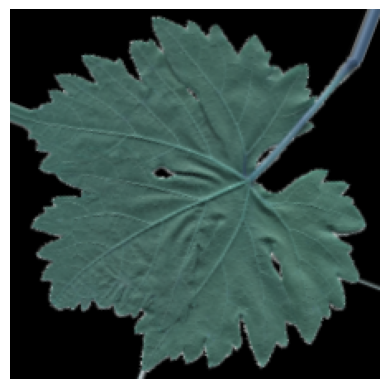

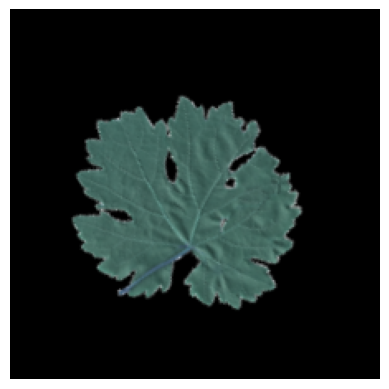

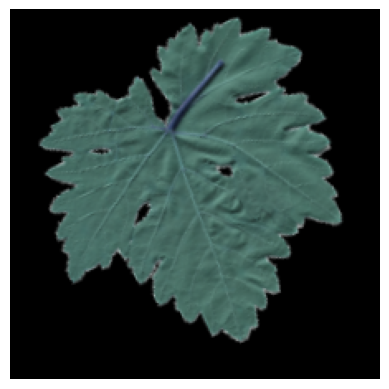

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli_augmented[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
features_Nazli.shape

(140, 224, 224, 3)

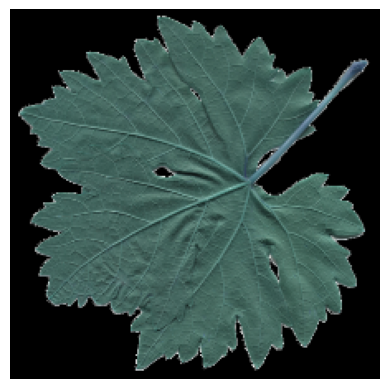

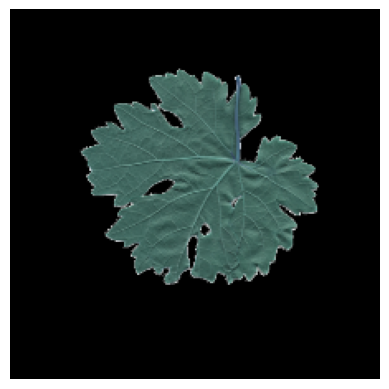

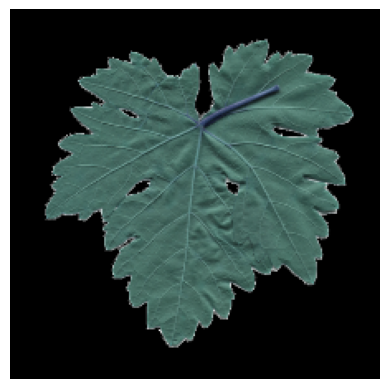

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
features_Ak, labels__Ak
features_Ala_Idris, labels_Ala_Idris
features_Buzgulu, labels_Buzgulu
features_Dimnit, labels_Dimnit
features_Nazli, labels_Nazli

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [ ]:
augmented_labels_Nazli = np.repeat(labels_Nazli, 4, axis=0)

print(augmented_labels_Nazli.shape)


(280,)


In [ ]:
for img in features_Ak:

  augmented_img = generator.random_transform(img)
  features_Ak = np.append(features_Ak,augmented_img)

features_Ak = np.reshape(features_Ak, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))


In [ ]:
 augmented_img_list = []

for img in features_Ak:
    augmented_img = generator.random_transform(img)
    augmented_img = generator2.random_transform(augmented_img)
    augmented_img_list.append(augmented_img)

features_Ak_augmented = np.array(augmented_img_list)

features_Ak_combined = np.concatenate((features_Ak, features_Ak_augmented), axis=0)

print("Original Features Shape:", features_Ak.shape)
print("Augmented Features Shape:", features_Ak_augmented.shape)
print("Combined Features Shape:", features_Ak_combined.shape)


Original Features Shape: (140, 224, 224, 3)
Augmented Features Shape: (140, 224, 224, 3)
Combined Features Shape: (280, 224, 224, 3)


In [ ]:
features_Ak.shape

(140, 224, 224, 3)

In [ ]:
augmented_labels_Ak = np.repeat(labels__Ak, 4, axis=0)

print(augmented_labels_Ak.shape)


(280,)


In [ ]:
for img in features_Ala_Idris:

  augmented_img = generator.random_transform(img)
  features_Ala_Idris = np.append(features_Ala_Idris,augmented_img)

features_Ala_Idris = np.reshape(features_Ala_Idris, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
augmented_img_list = []

for img in features_Ala_Idris:
    augmented_img = generator.random_transform(img)
    augmented_img = generator2.random_transform(augmented_img)
    augmented_img_list.append(augmented_img)

features_Ala_Idris_augmented = np.array(augmented_img_list)

features_Ala_Idris_combined = np.concatenate((features_Ala_Idris, features_Ala_Idris_augmented), axis=0)

print("Original Features Shape:", features_Ala_Idris.shape)
print("Augmented Features Shape:", features_Ala_Idris_augmented.shape)
print("Combined Features Shape:", features_Ala_Idris_combined.shape)


Original Features Shape: (140, 224, 224, 3)
Augmented Features Shape: (140, 224, 224, 3)
Combined Features Shape: (280, 224, 224, 3)


In [ ]:
augmented_labels_Ala_Idris = np.repeat(labels_Ala_Idris, 4, axis=0)

print(augmented_labels_Ala_Idris.shape)


(280,)


In [ ]:
for img in features_Buzgulu:

  augmented_img = generator.random_transform(img)
  features_Buzgulu = np.append(features_Buzgulu,augmented_img)

features_Buzgulu = np.reshape(features_Buzgulu, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
augmented_img_list = []

for img in features_Buzgulu:
    augmented_img = generator.random_transform(img)
    augmented_img = generator2.random_transform(augmented_img)
    augmented_img_list.append(augmented_img)

features_Buzgulu_augmented = np.array(augmented_img_list)

features_Buzgulu_combined = np.concatenate((features_Buzgulu, features_Buzgulu_augmented), axis=0)

print("Original Features Shape:", features_Buzgulu.shape)
print("Augmented Features Shape:", features_Buzgulu_augmented.shape)
print("Combined Features Shape:", features_Buzgulu_combined.shape)


Original Features Shape: (140, 224, 224, 3)
Augmented Features Shape: (140, 224, 224, 3)
Combined Features Shape: (280, 224, 224, 3)


In [ ]:
augmented_labels_Buzgulu = np.repeat(labels_Buzgulu, 4, axis=0)

print(augmented_labels_Buzgulu.shape)

(280,)


In [ ]:
for img in features_Dimnit:

  augmented_img = generator.random_transform(img)
  features_Dimnit = np.append(features_Dimnit,augmented_img)

features_Dimnit = np.reshape(features_Dimnit, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
augmented_img_list = []

for img in features_Dimnit:

    augmented_img = generator.random_transform(img)
    augmented_img = generator2.random_transform(augmented_img)
    augmented_img_list.append(augmented_img)

features_Dimnit_augmented = np.array(augmented_img_list)

features_Dimnit_combined = np.concatenate((features_Dimnit, features_Dimnit_augmented), axis=0)

print("Original Features Shape:", features_Dimnit.shape)
print("Augmented Features Shape:", features_Dimnit_augmented.shape)
print("Combined Features Shape:", features_Dimnit_combined.shape)


Original Features Shape: (140, 224, 224, 3)
Augmented Features Shape: (140, 224, 224, 3)
Combined Features Shape: (280, 224, 224, 3)


In [ ]:
augmented_labels_Dimnit = np.repeat(labels_Dimnit, 4, axis=0)

print(augmented_labels_Dimnit.shape)

(280,)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense , Activation , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
combined_features = np.concatenate((features_Ak_combined, features_Ala_Idris_combined, features_Buzgulu_combined, features_Dimnit_combined, features_Nazli_combined), axis=0)
combined_labels = np.concatenate((augmented_labels_Ak, augmented_labels_Ala_Idris, augmented_labels_Buzgulu, augmented_labels_Dimnit, augmented_labels_Nazli), axis=0)
combined_features.shape

(1400, 224, 224, 3)

In [ ]:
combined_labels.shape

(1400,)

In [ ]:
del features_Ak, features_Ala_Idris, features_Buzgulu, features_Dimnit, features_Nazli
del features_Ak_augmented,features_Ala_Idris_augmented,features_Buzgulu_augmented,features_Dimnit_augmented,features_Nazli_augmented
print("Shape of combined features after deletion:", combined_features.shape)

Shape of combined features after deletion: (1400, 224, 224, 3)


In [ ]:
del augmented_labels_Ak, augmented_labels_Ala_Idris, augmented_labels_Buzgulu, augmented_labels_Dimnit, augmented_labels_Nazli

print("Shape of combined labels after deletion:", combined_labels.shape)

Shape of combined labels after deletion: (1400,)


In [ ]:
reshaped_labels = combined_labels.reshape(-1, 1)

print(reshaped_labels.shape)

(1400, 1)


In [ ]:
from keras.utils import to_categorical

one_hot_labels = to_categorical(reshaped_labels)

print(one_hot_labels.shape)


(1400, 5)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(combined_features, one_hot_labels, test_size=0.2, random_state=42)

In [ ]:
from __future__ import print_function
from __future__ import absolute_import

import warnings
import numpy as np

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import get_file
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.layers import InputSpec

BASE_WEIGHT_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.6/'


def relu6(x):
    return K.relu(x, max_value=6)


class DepthwiseConv2D(Conv2D):
    """Depthwise separable 2D convolution.

    Depthwise Separable convolutions consists in performing
    just the first step in a depthwise spatial convolution
    (which acts on each input channel separately).
    The `depth_multiplier` argument controls how many
    output channels are generated per input channel in the depthwise step.

    # Arguments
        kernel_size: An integer or tuple/list of 2 integers, specifying the
            width and height of the 2D convolution window.
            Can be a single integer to specify the same value for
            all spatial dimensions.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.
        padding: one of `"valid"` or `"same"` (case-insensitive).
        depth_multiplier: The number of depthwise convolution output channels
            for each input channel.
            The total number of depthwise convolution output
            channels will be equal to `filters_in * depth_multiplier`.
        data_format: A string,
            one of `channels_last` (default) or `channels_first`.
            The ordering of the dimensions in the inputs.
            `channels_last` corresponds to inputs with shape
            `(batch, height, width, channels)` while `channels_first`
            corresponds to inputs with shape
            `(batch, channels, height, width)`.
            It defaults to the `image_data_format` value found in your
            Keras config file at `~/.keras/keras.json`.
            If you never set it, then it will be "channels_last".
        activation: Activation function to use
            (see [activations](keras./activations.md)).
            If you don't specify anything, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        depthwise_initializer: Initializer for the depthwise kernel matrix
            (see [initializers](keras./initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](keras./initializers.md)).
        depthwise_regularizer: Regularizer function applied to
            the depthwise kernel matrix
            (see [regularizer](keras./regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](keras./regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](keras./regularizers.md)).
        depthwise_constraint: Constraint function applied to
            the depthwise kernel matrix
            (see [constraints](keras./constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](keras./constraints.md)).

    # Input shape
        4D tensor with shape:
        `[batch, channels, rows, cols]` if data_format='channels_first'
        or 4D tensor with shape:
        `[batch, rows, cols, channels]` if data_format='channels_last'.

    # Output shape
        4D tensor with shape:
        `[batch, filters, new_rows, new_cols]` if data_format='channels_first'
        or 4D tensor with shape:
        `[batch, new_rows, new_cols, filters]` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to padding.
    """

    def __init__(self,
                 kernel_size,
                 strides=(1, 1),
                 padding='valid',
                 depth_multiplier=1,
                 data_format=None,
                 activation=None,
                 use_bias=True,
                 depthwise_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 depthwise_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 depthwise_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        super(DepthwiseConv2D, self).__init__(
            filters=None,
            kernel_size=kernel_size,
            strides=strides,
            padding=padding,
            data_format=data_format,
            activation=activation,
            use_bias=use_bias,
            bias_regularizer=bias_regularizer,
            activity_regularizer=activity_regularizer,
            bias_constraint=bias_constraint,
            **kwargs)
        self.depth_multiplier = depth_multiplier
        self.depthwise_initializer = initializers.get(depthwise_initializer)
        self.depthwise_regularizer = regularizers.get(depthwise_regularizer)
        self.depthwise_constraint = constraints.get(depthwise_constraint)
        self.bias_initializer = initializers.get(bias_initializer)

    def build(self, input_shape):
        if len(input_shape) < 4:
            raise ValueError('Inputs to `DepthwiseConv2D` should have rank 4. '
                             'Received input shape:', str(input_shape))
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = 3
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs to '
                             '`DepthwiseConv2D` '
                             'should be defined. Found `None`.')
        input_dim = int(input_shape[channel_axis])
        depthwise_kernel_shape = (self.kernel_size[0],
                                  self.kernel_size[1],
                                  input_dim,
                                  self.depth_multiplier)

        self.depthwise_kernel = self.add_weight(
            shape=depthwise_kernel_shape,
            initializer=self.depthwise_initializer,
            name='depthwise_kernel',
            regularizer=self.depthwise_regularizer,
            constraint=self.depthwise_constraint)

        if self.use_bias:
            self.bias = self.add_weight(shape=(input_dim * self.depth_multiplier,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        # Set input spec.
        self.input_spec = InputSpec(ndim=4, axes={channel_axis: input_dim})
        self.built = True

    def call(self, inputs, training=None):
        outputs = K.depthwise_conv2d(
            inputs,
            self.depthwise_kernel,
            strides=self.strides,
            padding=self.padding,
            dilation_rate=self.dilation_rate,
            data_format=self.data_format)

        if self.bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)

        if self.activation is not None:
            return self.activation(outputs)

        return outputs

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_first':
            rows = input_shape[2]
            cols = input_shape[3]
            out_filters = input_shape[1] * self.depth_multiplier
        elif self.data_format == 'channels_last':
            rows = input_shape[1]
            cols = input_shape[2]
            out_filters = input_shape[3] * self.depth_multiplier

        rows = conv_utils.conv_output_length(rows, self.kernel_size[0],
                                             self.padding,
                                             self.strides[0])
        cols = conv_utils.conv_output_length(cols, self.kernel_size[1],
                                             self.padding,
                                             self.strides[1])

        if self.data_format == 'channels_first':
            return (input_shape[0], out_filters, rows, cols)
        elif self.data_format == 'channels_last':
            return (input_shape[0], rows, cols, out_filters)

    def get_config(self):
        config = super(DepthwiseConv2D, self).get_config()
        config.pop('filters')
        config.pop('kernel_initializer')
        config.pop('kernel_regularizer')
        config.pop('kernel_constraint')
        config['depth_multiplier'] = self.depth_multiplier
        config['depthwise_initializer'] = initializers.serialize(self.depthwise_initializer)
        config['depthwise_regularizer'] = regularizers.serialize(self.depthwise_regularizer)
        config['depthwise_constraint'] = constraints.serialize(self.depthwise_constraint)
        return config

def _obtain_input_shape(input_shape,
                        default_size,
                        min_size,
                        data_format,
                        require_flatten,
                        weights=None):
    """Internal utility to compute/validate an ImageNet model's input shape.

    # Arguments
        input_shape: either None (will return the default network input shape),
            or a user-provided shape to be validated.
        default_size: default input width/height for the model.
        min_size: minimum input width/height accepted by the model.
        data_format: image data format to use.
        require_flatten: whether the model is expected to
            be linked to a classifier via a Flatten layer.
        weights: one of `None` (random initialization)
            or 'imagenet' (pre-training on ImageNet).
            If weights='imagenet' input channels must be equal to 3.

    # Returns
        An integer shape tuple (may include None entries).

    # Raises
        ValueError: in case of invalid argument values.
    """
    if weights != 'imagenet' and input_shape and len(input_shape) == 3:
        if data_format == 'channels_first':
            if input_shape[0] not in {1, 3}:
                warnings.warn(
                    'This model usually expects 1 or 3 input channels. '
                    'However, it was passed an input_shape with ' +
                    str(input_shape[0]) + ' input channels.')
            default_shape = (input_shape[0], default_size, default_size)
        else:
            if input_shape[-1] not in {1, 3}:
                warnings.warn(
                    'This model usually expects 1 or 3 input channels. '
                    'However, it was passed an input_shape with ' +
                    str(input_shape[-1]) + ' input channels.')
            default_shape = (default_size, default_size, input_shape[-1])
    else:
        if data_format == 'channels_first':
            default_shape = (3, default_size, default_size)
        else:
            default_shape = (default_size, default_size, 3)
    if input_shape is None:
        return default_shape
    if data_format == 'channels_first':
        if input_shape is not None:
            if len(input_shape) != 3:
                raise ValueError(
                    '`input_shape` must be a tuple of three integers.')
            if input_shape[0] != 3 and weights == 'imagenet':
                raise ValueError('The input must have 3 channels; got '
                                 '`input_shape=' + str(input_shape) + '`')
            if ((input_shape[1] is not None and input_shape[1] < min_size) or
               (input_shape[2] is not None and input_shape[2] < min_size)):
                raise ValueError('Input size must be at least ' +
                                 str(min_size) + 'x' + str(min_size) +
                                 '; got `input_shape=' +
                                 str(input_shape) + '`')
        else:
            raise ValueError('You should define `input_shape` as a tuple of three integers '
                             'or `None`. Received: input_shape=' + str(input_shape))
    else:
        if input_shape is not None:
            if len(input_shape) != 3:
                raise ValueError(
                    '`input_shape` must be a tuple of three integers.')
            if input_shape[-1] != 3 and weights == 'imagenet':
                raise ValueError('The input must have 3 channels; got '
                                 '`input_shape=' + str(input_shape) + '`')
            if ((input_shape[0] is not None and input_shape[0] < min_size) or
               (input_shape[1] is not None and input_shape[1] < min_size)):
                raise ValueError('Input size must be at least ' +
                                 str(min_size) + 'x' + str(min_size) +
                                 '; got `input_shape=' +
                                 str(input_shape) + '`')
        else:
            raise ValueError('You should define `input_shape` as a tuple of three integers '
                             'or `None`. Received: input_shape=' + str(input_shape))
    if require_flatten:
        if None in input_shape:
            raise ValueError(
                'If `include_top` is True, '
                'you should specify a static `input_shape`. '
                'Got `input_shape=' + str(input_shape) + '`')
    return input_shape


def MobileNet(input_shape=None,
              alpha=1.0,
              depth_multiplier=1,
              dropout=1e-3,
              include_top=True,
              weights='imagenet',
              input_tensor=None,
              pooling=None,
              classes=1000):
    """Instantiates the MobileNet architecture.

    ...

    # Determine proper input shape.
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=32,
                                      data_format=K.image_data_format())

    """
    """Instantiates the MobileNet architecture.

    Note that only TensorFlow is supported for now,
    therefore it only works with the data format
    `image_data_format='channels_last'` in your Keras config
    at `~/.keras/keras.json`.

    To load a MobileNet model via `load_model`, import the custom
    objects `relu6` and `DepthwiseConv2D` and pass them to the
    `custom_objects` parameter.
    E.g.
    model = load_model('mobilenet.h5', custom_objects={
                       'relu6': mobilenet.relu6,
                       'DepthwiseConv2D': mobilenet.DepthwiseConv2D})

    # Arguments
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data format)
            or (3, 224, 224) (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 32.
            E.g. `(200, 200, 3)` would be one valid value.
        alpha: controls the width of the network.
            - If `alpha` < 1.0, proportionally decreases the number
                of filters in each layer.
            - If `alpha` > 1.0, proportionally increases the number
                of filters in each layer.
            - If `alpha` = 1, default number of filters from the paper
                 are used at each layer.
        depth_multiplier: depth multiplier for depthwise convolution
            (also called the resolution multiplier)
        dropout: dropout rate
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: `None` (random initialization) or
            `imagenet` (ImageNet weights)
        input_tensor: optional Keras tensor (i.e. output of
            `layers.Input()`)
            to use as image input for the model.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model
                will be the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a
                2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
        RuntimeError: If attempting to run this model with a
            backend that does not support separable convolutions.
    """

    if K.backend() != 'tensorflow':
        raise RuntimeError('Only Tensorflow backend is currently supported, '
                           'as other backends do not support '
                           'depthwise convolution.')

    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as ImageNet with `include_top` '
                         'as true, `classes` should be 1000')

# Determine proper input shape.
    input_shape = _obtain_input_shape(input_shape,
                                  default_size=224,
                                  min_size=32,
                                  data_format=K.image_data_format(),
                                  require_flatten=include_top)
    if K.image_data_format() == 'channels_last':
        row_axis, col_axis = (0, 1)
    else:
        row_axis, col_axis = (1, 2)
    rows = input_shape[row_axis]
    cols = input_shape[col_axis]

    if weights == 'imagenet':
        if depth_multiplier != 1:
            raise ValueError('If imagenet weights are being loaded, '
                             'depth multiplier must be 1')

        if alpha not in [0.25, 0.50, 0.75, 1.0]:
            raise ValueError('If imagenet weights are being loaded, '
                             'alpha can be one of'
                             '`0.25`, `0.50`, `0.75` or `1.0` only.')

        if rows != cols or rows not in [128, 160, 192, 224]:
            raise ValueError('If imagenet weights are being loaded, '
                             'input must have a static square shape (one of '
                             '(128,128), (160,160), (192,192), or (224, 224)).'
                             ' Input shape provided = %s' % (input_shape,))

    if K.image_data_format() != 'channels_last':
        warnings.warn('The MobileNet family of models is only available '
                      'for the input data format "channels_last" '
                      '(width, height, channels). '
                      'However your settings specify the default '
                      'data format "channels_first" (channels, width, height).'
                      ' You should set `image_data_format="channels_last"` '
                      'in your Keras config located at ~/.keras/keras.json. '
                      'The model being returned right now will expect inputs '
                      'to follow the "channels_last" data format.')
        K.set_image_data_format('channels_last')
        old_data_format = 'channels_first'
    else:
        old_data_format = None

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = _conv_block(img_input, 32, alpha, strides=(2, 2))
    x = _depthwise_conv_block(x, 64, alpha, depth_multiplier, block_id=1)

    x = _depthwise_conv_block(x, 128, alpha, depth_multiplier,
                              strides=(2, 2), block_id=2)
    x = _depthwise_conv_block(x, 128, alpha, depth_multiplier, block_id=3)

    x = _depthwise_conv_block(x, 256, alpha, depth_multiplier,
                              strides=(2, 2), block_id=4)
    x = _depthwise_conv_block(x, 256, alpha, depth_multiplier, block_id=5)

    x = _depthwise_conv_block(x, 512, alpha, depth_multiplier,
                              strides=(2, 2), block_id=6)
    x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=7)
    x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=8)
    x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=9)
    x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=10)
    x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=11)

    x = _depthwise_conv_block(x, 1024, alpha, depth_multiplier,
                              strides=(2, 2), block_id=12)
    x = _depthwise_conv_block(x, 1024, alpha, depth_multiplier, block_id=13)

    if include_top:
        if K.image_data_format() == 'channels_first':
            shape = (int(1024 * alpha), 1, 1)
        else:
            shape = (1, 1, int(1024 * alpha))

        x = GlobalAveragePooling2D()(x)
        x = Reshape(shape, name='reshape_1')(x)
        x = Dropout(dropout, name='dropout')(x)
        x = Conv2D(classes, (1, 1),
                   padding='same', name='conv_preds')(x)
        x = Activation('softmax', name='act_softmax')(x)
        x = Reshape((classes,), name='reshape_2')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    # Create model.
    model = Model(inputs, x, name='mobilenet_%0.2f_%s' % (alpha, rows))

    # load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            raise ValueError('Weights for "channels_last" format '
                             'are not available.')
        if alpha == 1.0:
            alpha_text = '1_0'
        elif alpha == 0.75:
            alpha_text = '7_5'
        elif alpha == 0.50:
            alpha_text = '5_0'
        else:
            alpha_text = '2_5'

        if include_top:
            model_name = 'mobilenet_%s_%d_tf.h5' % (alpha_text, rows)
            weigh_path = BASE_WEIGHT_PATH + model_name
            weights_path = get_file(model_name,
                                    weigh_path,
                                    cache_subdir='models')
        else:
            model_name = 'mobilenet_%s_%d_tf_no_top.h5' % (alpha_text, rows)
            weigh_path = BASE_WEIGHT_PATH + model_name
            weights_path = get_file(model_name,
                                    weigh_path,
                                    cache_subdir='models')
        model.load_weights(weights_path)

    if old_data_format:
        K.set_image_data_format(old_data_format)
    return model


def _conv_block(inputs, filters, alpha, kernel=(3, 3), strides=(1, 1)):
    """Adds an initial convolution layer (with batch normalization and relu6).

    # Arguments
        inputs: Input tensor of shape `(rows, cols, 3)`
            (with `channels_last` data format) or
            (3, rows, cols) (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 32.
            E.g. `(224, 224, 3)` would be one valid value.
        filters: Integer, the dimensionality of the output space
            (i.e. the number output of filters in the convolution).
        alpha: controls the width of the network.
            - If `alpha` < 1.0, proportionally decreases the number
                of filters in each layer.
            - If `alpha` > 1.0, proportionally increases the number
                of filters in each layer.
            - If `alpha` = 1, default number of filters from the paper
                 are used at each layer.
        kernel: An integer or tuple/list of 2 integers, specifying the
            width and height of the 2D convolution window.
            Can be a single integer to specify the same value for
            all spatial dimensions.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.

    # Input shape
        4D tensor with shape:
        `(samples, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, rows, cols, channels)` if data_format='channels_last'.

    # Output shape
        4D tensor with shape:
        `(samples, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to stride.

    # Returns
        Output tensor of block.
    """
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    filters = int(filters * alpha)
    x = Conv2D(filters, kernel,
               padding='same',
               use_bias=False,
               strides=strides,
               name='conv1')(inputs)
    x = BatchNormalization(axis=channel_axis, name='conv1_bn')(x)
    return Activation(relu6, name='conv1_relu')(x)


def _depthwise_conv_block(inputs, pointwise_conv_filters, alpha,
                          depth_multiplier=1, strides=(1, 1), block_id=1):
    """Adds a depthwise convolution block.

    A depthwise convolution block consists of a depthwise conv,
    batch normalization, relu6, pointwise convolution,
    batch normalization and relu6 activation.

    # Arguments
        inputs: Input tensor of shape `(rows, cols, channels)`
            (with `channels_last` data format) or
            (channels, rows, cols) (with `channels_first` data format).
        pointwise_conv_filters: Integer, the dimensionality of the output space
            (i.e. the number output of filters in the pointwise convolution).
        alpha: controls the width of the network.
            - If `alpha` < 1.0, proportionally decreases the number
                of filters in each layer.
            - If `alpha` > 1.0, proportionally increases the number
                of filters in each layer.
            - If `alpha` = 1, default number of filters from the paper
                 are used at each layer.
        depth_multiplier: The number of depthwise convolution output channels
            for each input channel.
            The total number of depthwise convolution output
            channels will be equal to `filters_in * depth_multiplier`.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.
        block_id: Integer, a unique identification designating the block number.

    # Input shape
        4D tensor with shape:
        `(batch, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, rows, cols, channels)` if data_format='channels_last'.

    # Output shape
        4D tensor with shape:
        `(batch, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to stride.

    # Returns
        Output tensor of block.
    """
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    pointwise_conv_filters = int(pointwise_conv_filters * alpha)

    x = DepthwiseConv2D((3, 3),
                        padding='same',
                        depth_multiplier=depth_multiplier,
                        strides=strides,
                        use_bias=False,
                        name='conv_dw_%d' % block_id)(inputs)
    x = BatchNormalization(axis=channel_axis, name='conv_dw_%d_bn' % block_id)(x)
    x = Activation(relu6, name='conv_dw_%d_relu' % block_id)(x)

    x = Conv2D(pointwise_conv_filters, (1, 1),
               padding='same',
               use_bias=False,
               strides=(1, 1),
               name='conv_pw_%d' % block_id)(x)
    x = BatchNormalization(axis=channel_axis, name='conv_pw_%d_bn' % block_id)(x)
    return Activation(relu6, name='conv_pw_%d_relu' % block_id)(x)


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.applications import MobileNet

# Define the base MobileNet model
base_model = MobileNet(input_shape=(224, 224, 3),
                       alpha=1.0,
                       depth_multiplier=1,
                       dropout=0.3,
                       include_top=False,
                       weights='imagenet',
                       input_tensor=None,
                       pooling=None,
                       classes=5)

# Additional layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)  # Regularization
x = Dense(512, activation='relu')(x)

# Output layer
predictions = Dense(5, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last Ten layers for fine-tuning
for layer in model.layers[-10:]:
    layer.trainable = True

optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])




reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(
    X_train ,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, checkpoint]
)

# Load the best model
best_model = load_model('best_model.h5')


Epoch 1/100
35/35 [==============================] - ETA: 0s - loss: 3.7066 - accuracy: 0.5330
Epoch 1: val_loss improved from inf to 1.84299, saving model to best_model.h5
35/35 [==============================] - 24s 296ms/step - loss: 3.7066 - accuracy: 0.5330 - val_loss: 1.8430 - val_accuracy: 0.4750 - lr: 1.0000e-04
Epoch 2/100
35/35 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.8759
Epoch 2: val_loss did not improve from 1.84299
35/35 [==============================] - 4s 126ms/step - loss: 0.4386 - accuracy: 0.8759 - val_loss: 3.1805 - val_accuracy: 0.4143 - lr: 1.0000e-04
Epoch 3/100
35/35 [==============================] - ETA: 0s - loss: 0.1933 - accuracy: 0.9366
Epoch 3: val_loss improved from 1.84299 to 0.76313, saving model to best_model.h5
35/35 [==============================] - 11s 307ms/step - loss: 0.1933 - accuracy: 0.9366 - val_loss: 0.7631 - val_accuracy: 0.7607 - lr: 1.0000e-04
Epoch 4/100
35/35 [==============================] - ETA: 0s -

In [ ]:
plot_model(model, to_file = 'mobilenet_black.png', show_shapes = True, show_layer_names = True)

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test"


In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])

def create_testset():
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []


    files_list = os.listdir(DATASET_DIR)
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR,file_name)
      img=cv2.imread(img)

      white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      img[white_pixels]=0
      if percentage >= 80:
         img=generator1.random_transform(img)
      else:
         img=generator2.random_transform(img)




      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      i+=1
    print(f"Number of test data = ",i)

    features = np.array(features)

    return features



In [ ]:
test_data=create_testset()

Number of test data =  150


In [ ]:
test_data.shape

(150, 224, 224, 3)

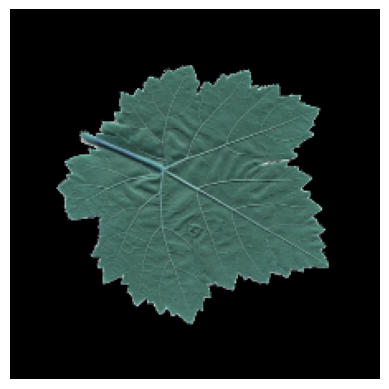

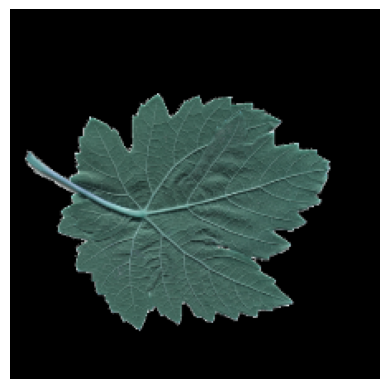

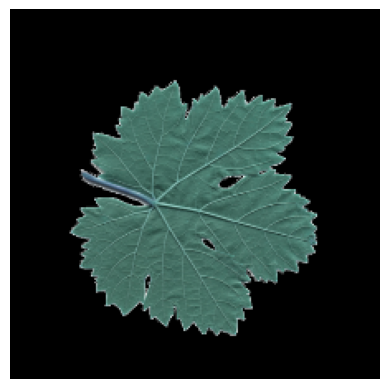

In [ ]:
for i in range(3):

  plt.imshow(test_data[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

5/5 [==============================] - 1s 235ms/step


In [ ]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 3, 2, 4, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
filenames_without_extension = [filename.replace(".png", "") for filename in os.listdir(DATASET_DIR)]

pred={
    'ID':filenames_without_extension,
    'label':predicted_classes
}

submit=pd.DataFrame(pred)
submit.head()

,ID,label
0,image4,0
1,image29,0
2,image7,0
3,image28,0
4,image13,0


In [ ]:
submit.tail()

,ID,label
145,image150,4
146,image136,4
147,image130,4
148,image144,4
149,image149,4


In [ ]:
submit.to_csv('mahran-mobilenetf.csv',index=False)